In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [19]:
teams = pd.read_csv("teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [20]:
#read thes csv file
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [21]:
#Check to see if the athlets and prev_medals columns can be used to predict the medals column
teams.corr()["medals"]

/var/folders/92/hw_yvh2s6ml3hlsjb02h6g5w0000gn/T/ipykernel_79664/2666975009.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()["medals"]


year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

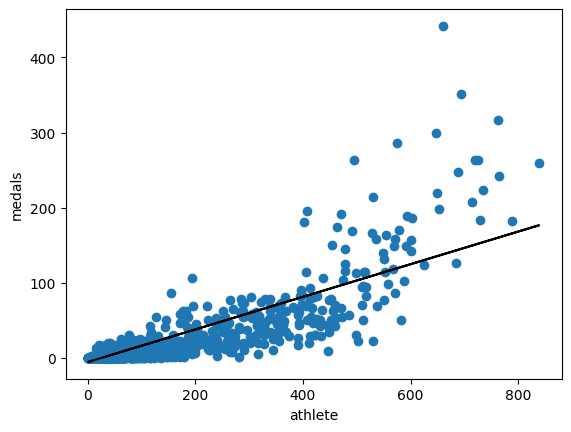

In [22]:
#Scatter Plot of athletes and medals
plt.scatter(teams["athletes"], teams["medals"])
plt.xlabel("athlete")
plt.ylabel("medals")

#plot a linear regression line
m, b = np.polyfit(teams["athletes"], teams["medals"], 1)
plt.plot(teams["athletes"], m*teams["athletes"]+b, color='black')

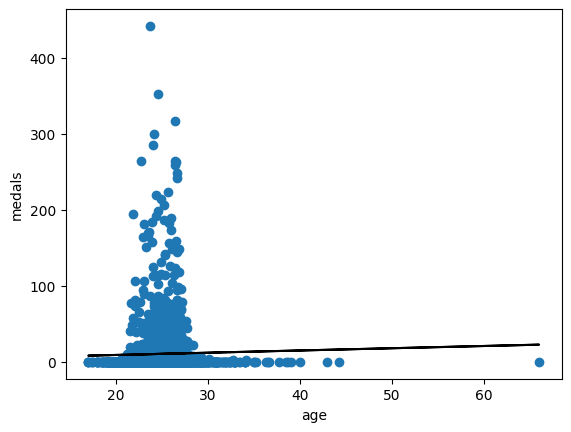

In [23]:
#Scatter Plot of age and medals
plt.scatter(teams["age"], teams["medals"])
plt.xlabel("age")
plt.ylabel("medals")

#plot a linear regression line
m, b = np.polyfit(teams["age"], teams["medals"], 1)
plt.plot(teams["age"], m*teams["age"]+b, color='black')

<AxesSubplot: ylabel='Frequency'>

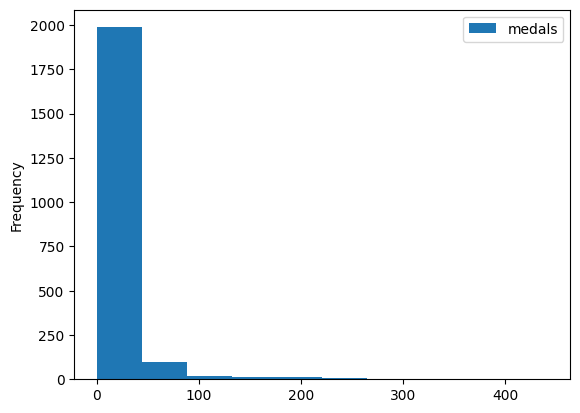

In [24]:
#medals won by each country histogram
teams.plot.hist(y="medals")

In [25]:
#find missing data
teams[teams.isnull().any(axis=1)]

#drop NaN values
teams = teams.dropna()
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [26]:
#Split the data to a train and test set
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [27]:
#train - trains the model
#test - evaluates how well the model is doing

In [28]:
#initialize linear regression class
reg = LinearRegression()

#use athletes and prev_medals columns to predict the medals columns
predictors = ["athletes", "prev_medals"]
target = "medals"

In [29]:
reg.fit(train[predictors], train["medals"])
predictions = reg.predict(test[predictors])
test["predictions"] = predictions

#makes any values less than 0, 0
test.loc[test["predictions"] < 0, "predictions"] = 0
#round all values
test["predictions"] = test["predictions"].round()
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [30]:
#calculate the mean absolute error
error = mean_absolute_error(test["medals"], test["predictions"])
error #this values shows how many medals off the actual number of medals won

3.2987654320987656

In [31]:
#number of medals we were off by on average for each country
errors = (test["medals"] - test["predictions"]).abs()
error_by_team = errors.groupby(test["team"]).mean()

#number of medals earned by each country
medals_by_team = test["medals"].groupby(test["team"]).mean()

#ration between errors
error_ratio =  error_by_team / medals_by_team 

In [32]:
#remove NaN values
error_ratio[~pd.isnull(error_ratio)]
#remove infinite values
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<AxesSubplot: ylabel='Frequency'>

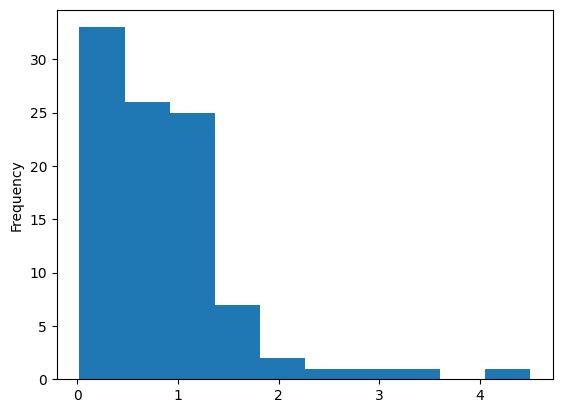

In [33]:
#plot error ratio (how close you were to the medal count)
error_ratio.plot.hist()

In [72]:
## IMPROVE THE MODEL BY ADDING PREV_3_MEDALS
new_teams = pd.read_csv("teams.csv")
new_teams = new_teams[["team", "country", "year", "athletes", "age", "prev_medals", "prev_3_medals", "events", "medals"]]
new_teams

,team,country,year,athletes,age,prev_medals,prev_3_medals,events,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0.0,8,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0.0,5,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0.0,8,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0.0,11,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0.0,5,0
...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0.0,19,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,0.0,11,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,1.0,15,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,2.3,8,0


In [73]:
#find missing data
new_teams[new_teams.isnull().any(axis=1)]

#drop NaN values
new_teams = new_teams.dropna()
new_teams

,team,country,year,athletes,age,prev_medals,prev_3_medals,events,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0.0,8,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0.0,5,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0.0,8,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0.0,11,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0.0,5,0
...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0.0,19,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,0.0,11,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,1.0,15,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,2.3,8,0


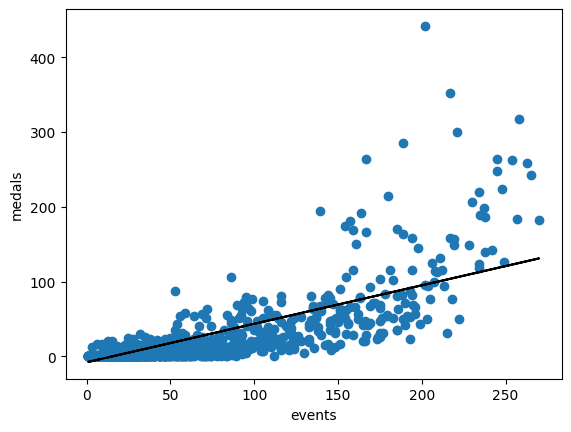

In [98]:
#Looking at the correlation by looking at the number of events
teams = pd.read_csv("teams.csv")

#Scatter Plot of age and medals
plt.scatter(teams["events"], teams["medals"])
plt.xlabel("events")
plt.ylabel("medals")

#plot a linear regression line
m, b = np.polyfit(teams["events"], teams["medals"], 1)
plt.plot(teams["events"], m*teams["events"]+b, color='black')

In [74]:
#Split the data to a train and test set
new_train = new_teams[new_teams["year"] < 2012].copy()
new_test = new_teams[new_teams["year"] >= 2012].copy()

In [95]:
#initialize linear regression class
reg = LinearRegression()

#use athletes and prev_medals columns to predict the medals columns
predictors = ["athletes", "prev_medals", "events"]
target = "medals"

In [96]:
reg.fit(new_train[predictors], new_train["medals"])
predictions = reg.predict(new_test[predictors])
new_test["predictions"] = predictions

#makes any values less than 0, 0
new_test.loc[new_test["predictions"] < 0, "predictions"] = 0
#round all values
new_test["predictions"] = new_test["predictions"].round()
new_test

,team,country,year,athletes,age,prev_medals,prev_3_medals,events,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,0.3,6,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0.7,3,0,1.0
24,ALB,Albania,2012,10,25.7,0.0,0.0,9,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0.0,6,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,2.3,29,1,0.0
...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0.0,3,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0.0,7,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0.0,7,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,2.3,8,0,2.0


In [97]:
#calculate the mean absolute error
error = mean_absolute_error(new_test["medals"], new_test["predictions"])
error #this values shows how many medals off the actual number of medals won

3.269135802469136

In [99]:
#number of medals we were off by on average for each country
errors = (new_test["medals"] - new_test["predictions"]).abs()
error_by_team = errors.groupby(new_test["team"]).mean()

#number of medals earned by each country
medals_by_team = new_test["medals"].groupby(new_test["team"]).mean()

#ration between errors
error_ratio =  error_by_team / medals_by_team 

In [100]:
#remove NaN values
error_ratio[~pd.isnull(error_ratio)]
#remove infinite values
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    2.000000
ALG    1.000000
ARG    0.951220
ARM    1.000000
AUS    0.331633
         ...   
UKR    0.317073
USA    0.109375
UZB    1.000000
VEN    1.000000
VIE    1.000000
Length: 97, dtype: float64

<AxesSubplot: ylabel='Frequency'>

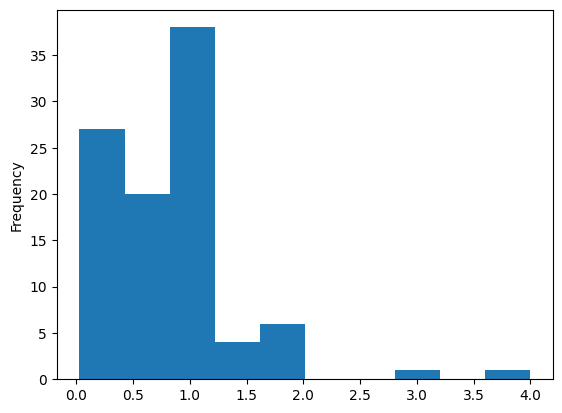

In [101]:
#plot error ratio (how close you were to the medal count)
error_ratio.plot.hist()